In [1]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full (3).csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
data = pd.read_csv("bank-full.csv", delimiter=';')


In [4]:
# Display the first 5 rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Display the shape of the dataset
data.shape

(45211, 17)

In [6]:
# Display the summary statistics of the dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Display the data types of the variables in the dataset
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

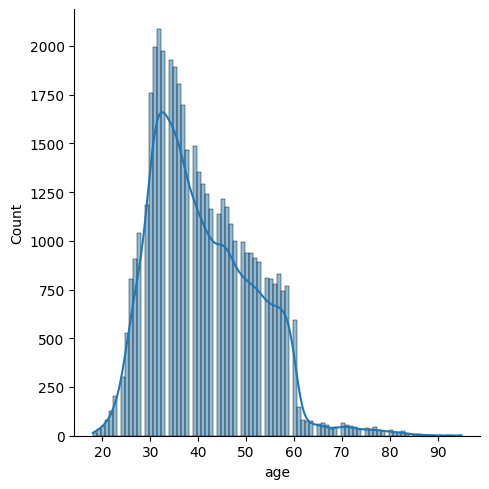

In [9]:
sns.displot(data['age'], kde=True)

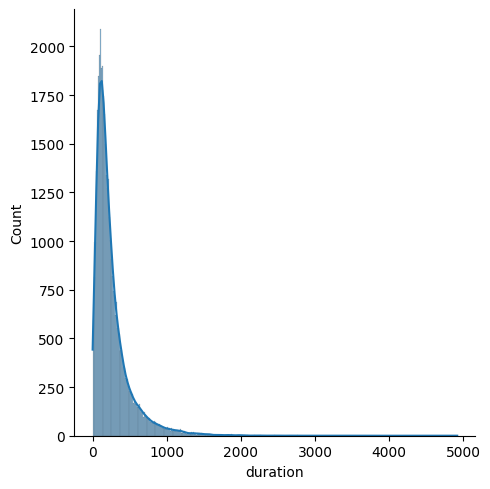

In [10]:
sns.displot(data['duration'], kde=True)

<Axes: >

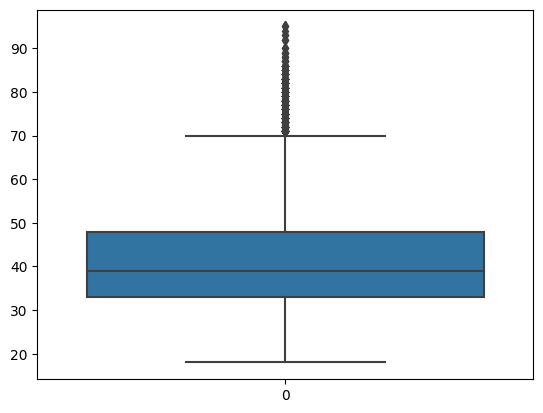

In [11]:
sns.boxplot(data['age'])

<Axes: >

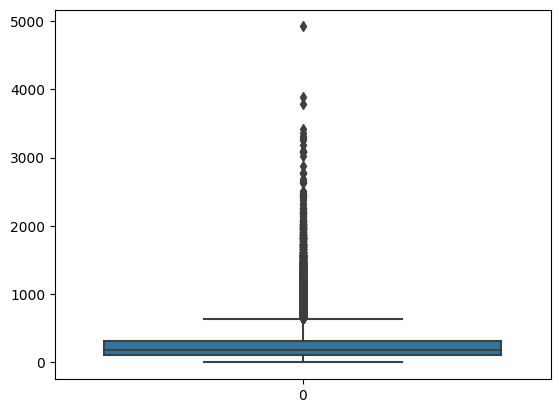

In [12]:
sns.boxplot(data['duration'])

<ipython-input-13-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

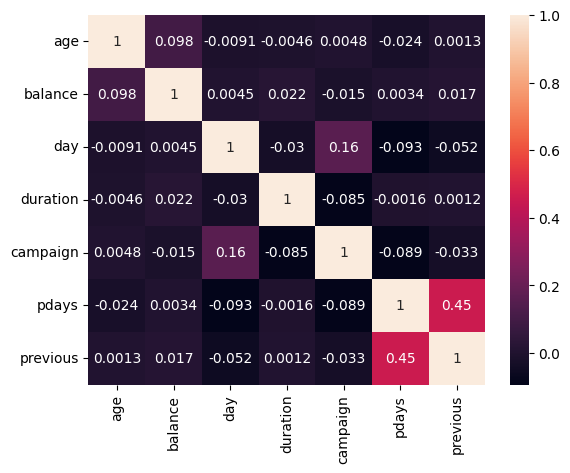

In [13]:
sns.heatmap(data.corr(), annot=True)

In [14]:
#identifying columns that may require additional processing or cleaning due to their data type.
data_new = data
colname=[]
for x in data_new.columns:
    if data_new[x].dtypes=='object':
        colname.append(x)
colname     

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data_new[x]=le.fit_transform(data_new[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature job
mapping {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Feature marital
mapping {'divorced': 0, 'married': 1, 'single': 2}
Feature education
mapping {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Feature default
mapping {'no': 0, 'yes': 1}
Feature housing
mapping {'no': 0, 'yes': 1}
Feature loan
mapping {'no': 0, 'yes': 1}
Feature contact
mapping {'cellular': 0, 'telephone': 1, 'unknown': 2}
Feature month
mapping {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
Feature poutcome
mapping {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
Feature y
mapping {'no': 0, 'yes': 1}


In [16]:
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [17]:
data_new.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


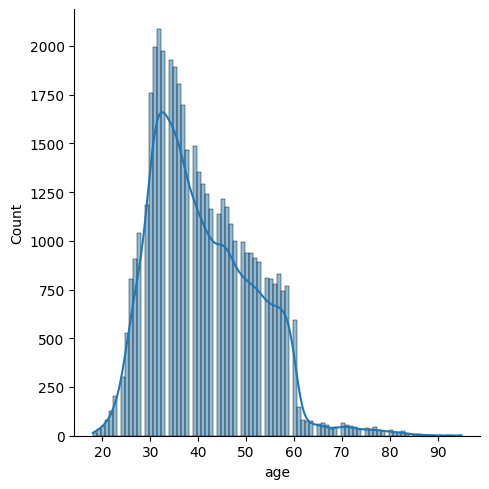

In [18]:
sns.displot(data_new['age'], kde=True)

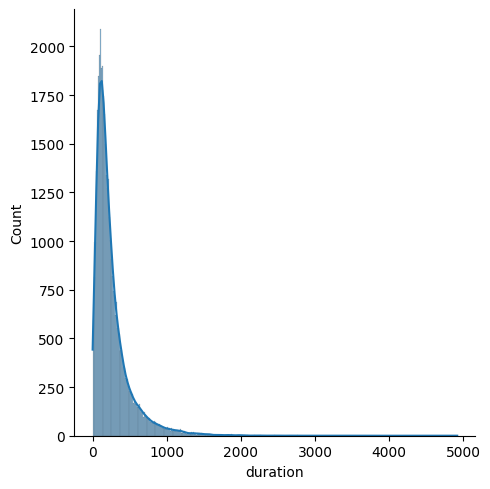

In [19]:
sns.displot(data_new['duration'], kde=True)

<Axes: >

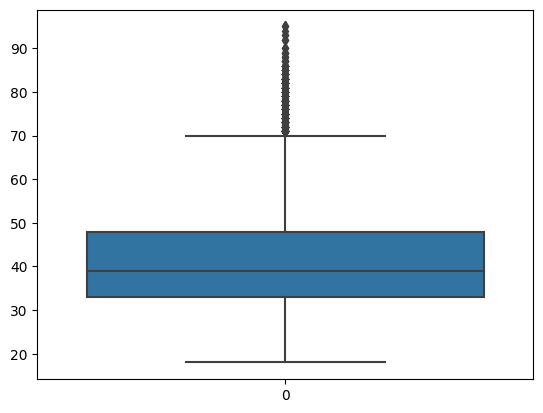

In [20]:
sns.boxplot(data_new['age'])

<Axes: >

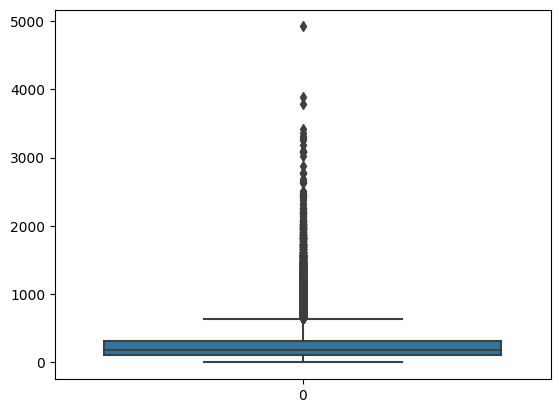

In [21]:
sns.boxplot(data_new['duration'])

In [22]:
# Remove the outliers
Q1 = data_new['age'].quantile(0.25)
Q3 = data_new['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
data_new = data_new[(data_new['age'] >= lower_bound) & (data_new['age'] <= upper_bound)]

<Axes: >

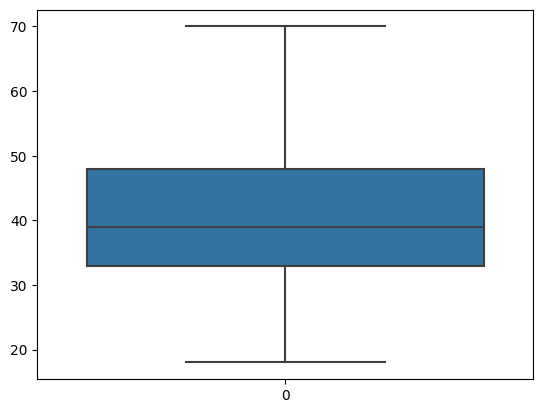

In [23]:
sns.boxplot(data_new['age'])

In [26]:
df = data_new

In [27]:
# Calculate the Z-score for the duration column
z_scores = np.abs((df['duration'] - df['duration'].mean()) / df['duration'].std())

# Define a threshold value for outlier detection
threshold = 3

# Filter the dataset to remove outliers
df = df[z_scores < threshold]

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,8,2,2,0,113,0,0,0,17,9,266,1,-1,0,3,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [36]:
data1 = df
# Calculate the IQR
Q1 = data1['duration'].quantile(0.1)
Q3 = data1['duration'].quantile(0.5)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
data_new1 = data1[(data1['duration'] >= lower_bound) & (data1['duration'] <= upper_bound)]


<Axes: >

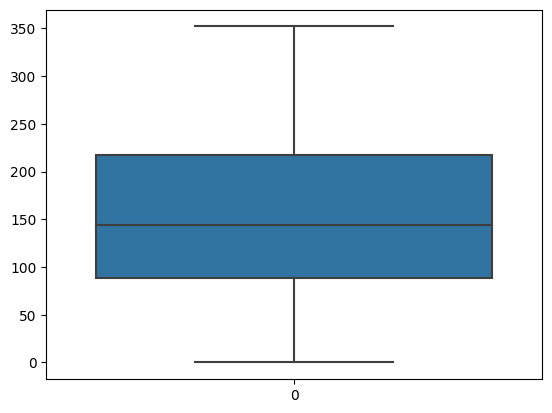

In [37]:
sns.boxplot(data_new1['duration'])

In [38]:
data_new1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,36,4,2,1,0,1511,1,0,0,16,9,270,1,-1,0,3,1
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3,0
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2,1
45202,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,3,1


In [39]:
data_new1.describe()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000,35197.000000
mean,40.646561,4.329289,1.166974,1.224763,0.018610,1319.149331,0.561099,0.165270,0.651163,15.877177,5.523653,155.502855,2.857459,40.010512,0.571668,2.556582,0.059011
std,9.904398,3.286079,0.604790,0.745233,0.135143,3006.755559,0.496260,0.371429,0.902777,8.359830,2.988279,86.286227,3.288043,100.269767,2.372229,0.998245,0.235648
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,64.000000,0.000000,0.000000,0.000000,8.000000,3.000000,88.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,423.000000,1.000000,0.000000,0.000000,16.000000,6.000000,144.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1367.000000,1.000000,0.000000,2.000000,21.000000,8.000000,217.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,70.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,352.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [40]:
X = data_new.values[:,0:-1]
Y = data_new.values[:,-1]

In [41]:
X.shape

(35197, 16)

In [42]:
Y.shape

(35197,)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [44]:
print(X)

[[ 1.75211926 -0.10020882 -0.27609041 ... -0.40900758 -0.24098691
   0.44420437]
 [ 0.33858565  1.42138297  1.37739848 ... -0.40900758 -0.24098691
   0.44420437]
 [-0.77204791 -0.70884553 -0.27609041 ... -0.40900758 -0.24098691
   0.44420437]
 ...
 [ 1.24728583 -0.10020882 -0.27609041 ...  1.43604136  1.44521482
  -0.55756799]
 [-0.67108122 -1.31748224  1.37739848 ... -0.40900758 -0.24098691
   0.44420437]
 [-1.78171478  1.11706461  1.37739848 ... -0.40900758 -0.24098691
   0.44420437]]


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(24637, 16)
(24637,)
(10560, 16)
(10560,)


In [47]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,Y_train)

LogisticRegression()

In [48]:
Y_pred=classifier.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))


[0 0 0 ... 0 0 0]
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[9887   40]
 [ 572   61]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9927
           1       0.60      0.10      0.17       633

    accuracy                           0.94     10560
   macro avg       0.77      0.55      0.57     10560
weighted avg       0.92      0.94      0.92     10560

Accuracy of the model:  0.9420454545454545
